In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import calendar

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/user/leuven/351/vsc35102/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
#Read in data 

file = '/data/leuven/351/vsc35102/scratch/Full_Data_Set/time_features.csv'

dataframe = pd.read_csv(file)

In [26]:
dataframe

,description,result_timestamp,laeq,date,time,hour,weekday,month,weekend,holiday,exam_period
0,MP 03: Naamsestraat 62 Taste,2022-01-01 00:00:00,63.267554,2022-01-01,00:00:00,0,Saturday,1,True,True,False
1,MP 03: Naamsestraat 62 Taste,2022-01-01 00:10:00,60.254000,2022-01-01,00:10:00,0,Saturday,1,True,True,False
2,MP 03: Naamsestraat 62 Taste,2022-01-01 00:20:00,55.143907,2022-01-01,00:20:00,0,Saturday,1,True,True,False
3,MP 03: Naamsestraat 62 Taste,2022-01-01 00:30:00,58.230167,2022-01-01,00:30:00,0,Saturday,1,True,True,False
4,MP 03: Naamsestraat 62 Taste,2022-01-01 00:40:00,54.220466,2022-01-01,00:40:00,0,Saturday,1,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
337049,MP08bis - Vrijthof,2022-12-31 23:10:00,56.973500,2022-12-31,23:10:00,23,Saturday,12,True,True,False
337050,MP08bis - Vrijthof,2022-12-31 23:20:00,58.590000,2022-12-31,23:20:00,23,Saturday,12,True,True,False
337051,MP08bis - Vrijthof,2022-12-31 23:30:00,58.432500,2022-12-31,23:30:00,23,Saturday,12,True,True,False
337052,MP08bis - Vrijthof,2022-12-31 23:40:00,59.046000,2022-12-31,23:40:00,23,Saturday,12,True,True,False


In [27]:
#Any missing data?
print("missing_data:", dataframe.isna().sum())

missing_data: description            0
result_timestamp       0
laeq                4599
date                   0
time                   0
hour                   0
weekday                0
month                  0
weekend                0
holiday                0
exam_period            0
dtype: int64


In [28]:
dataframe['result_timestamp'] = pd.to_datetime(dataframe['result_timestamp'])

In [6]:
#Build a profile for  quick EDA look

profile = ProfileReport(dataframe, title="Noise dataset", html={'style': {'full_width': True}}, sort= None)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [33]:
sampled_df = dataframe.groupby(['weekday','description', 'month', 'hour'])['laeq'].mean().reset_index()
sampled_df['month'] = sampled_df['month'].apply(lambda x: calendar.month_name[x])

sampled_df

,weekday,description,month,hour,laeq
0,Friday,MP 01: Naamsestraat 35 Maxim,March,0,62.870403
1,Friday,MP 01: Naamsestraat 35 Maxim,March,1,65.755889
2,Friday,MP 01: Naamsestraat 35 Maxim,March,2,65.305444
3,Friday,MP 01: Naamsestraat 35 Maxim,March,3,63.014729
4,Friday,MP 01: Naamsestraat 35 Maxim,March,4,59.890764
...,...,...,...,...,...
13327,Wednesday,MP08bis - Vrijthof,December,19,45.343556
13328,Wednesday,MP08bis - Vrijthof,December,20,44.284611
13329,Wednesday,MP08bis - Vrijthof,December,21,44.028271
13330,Wednesday,MP08bis - Vrijthof,December,22,43.697596


<Figure size 720x432 with 0 Axes>

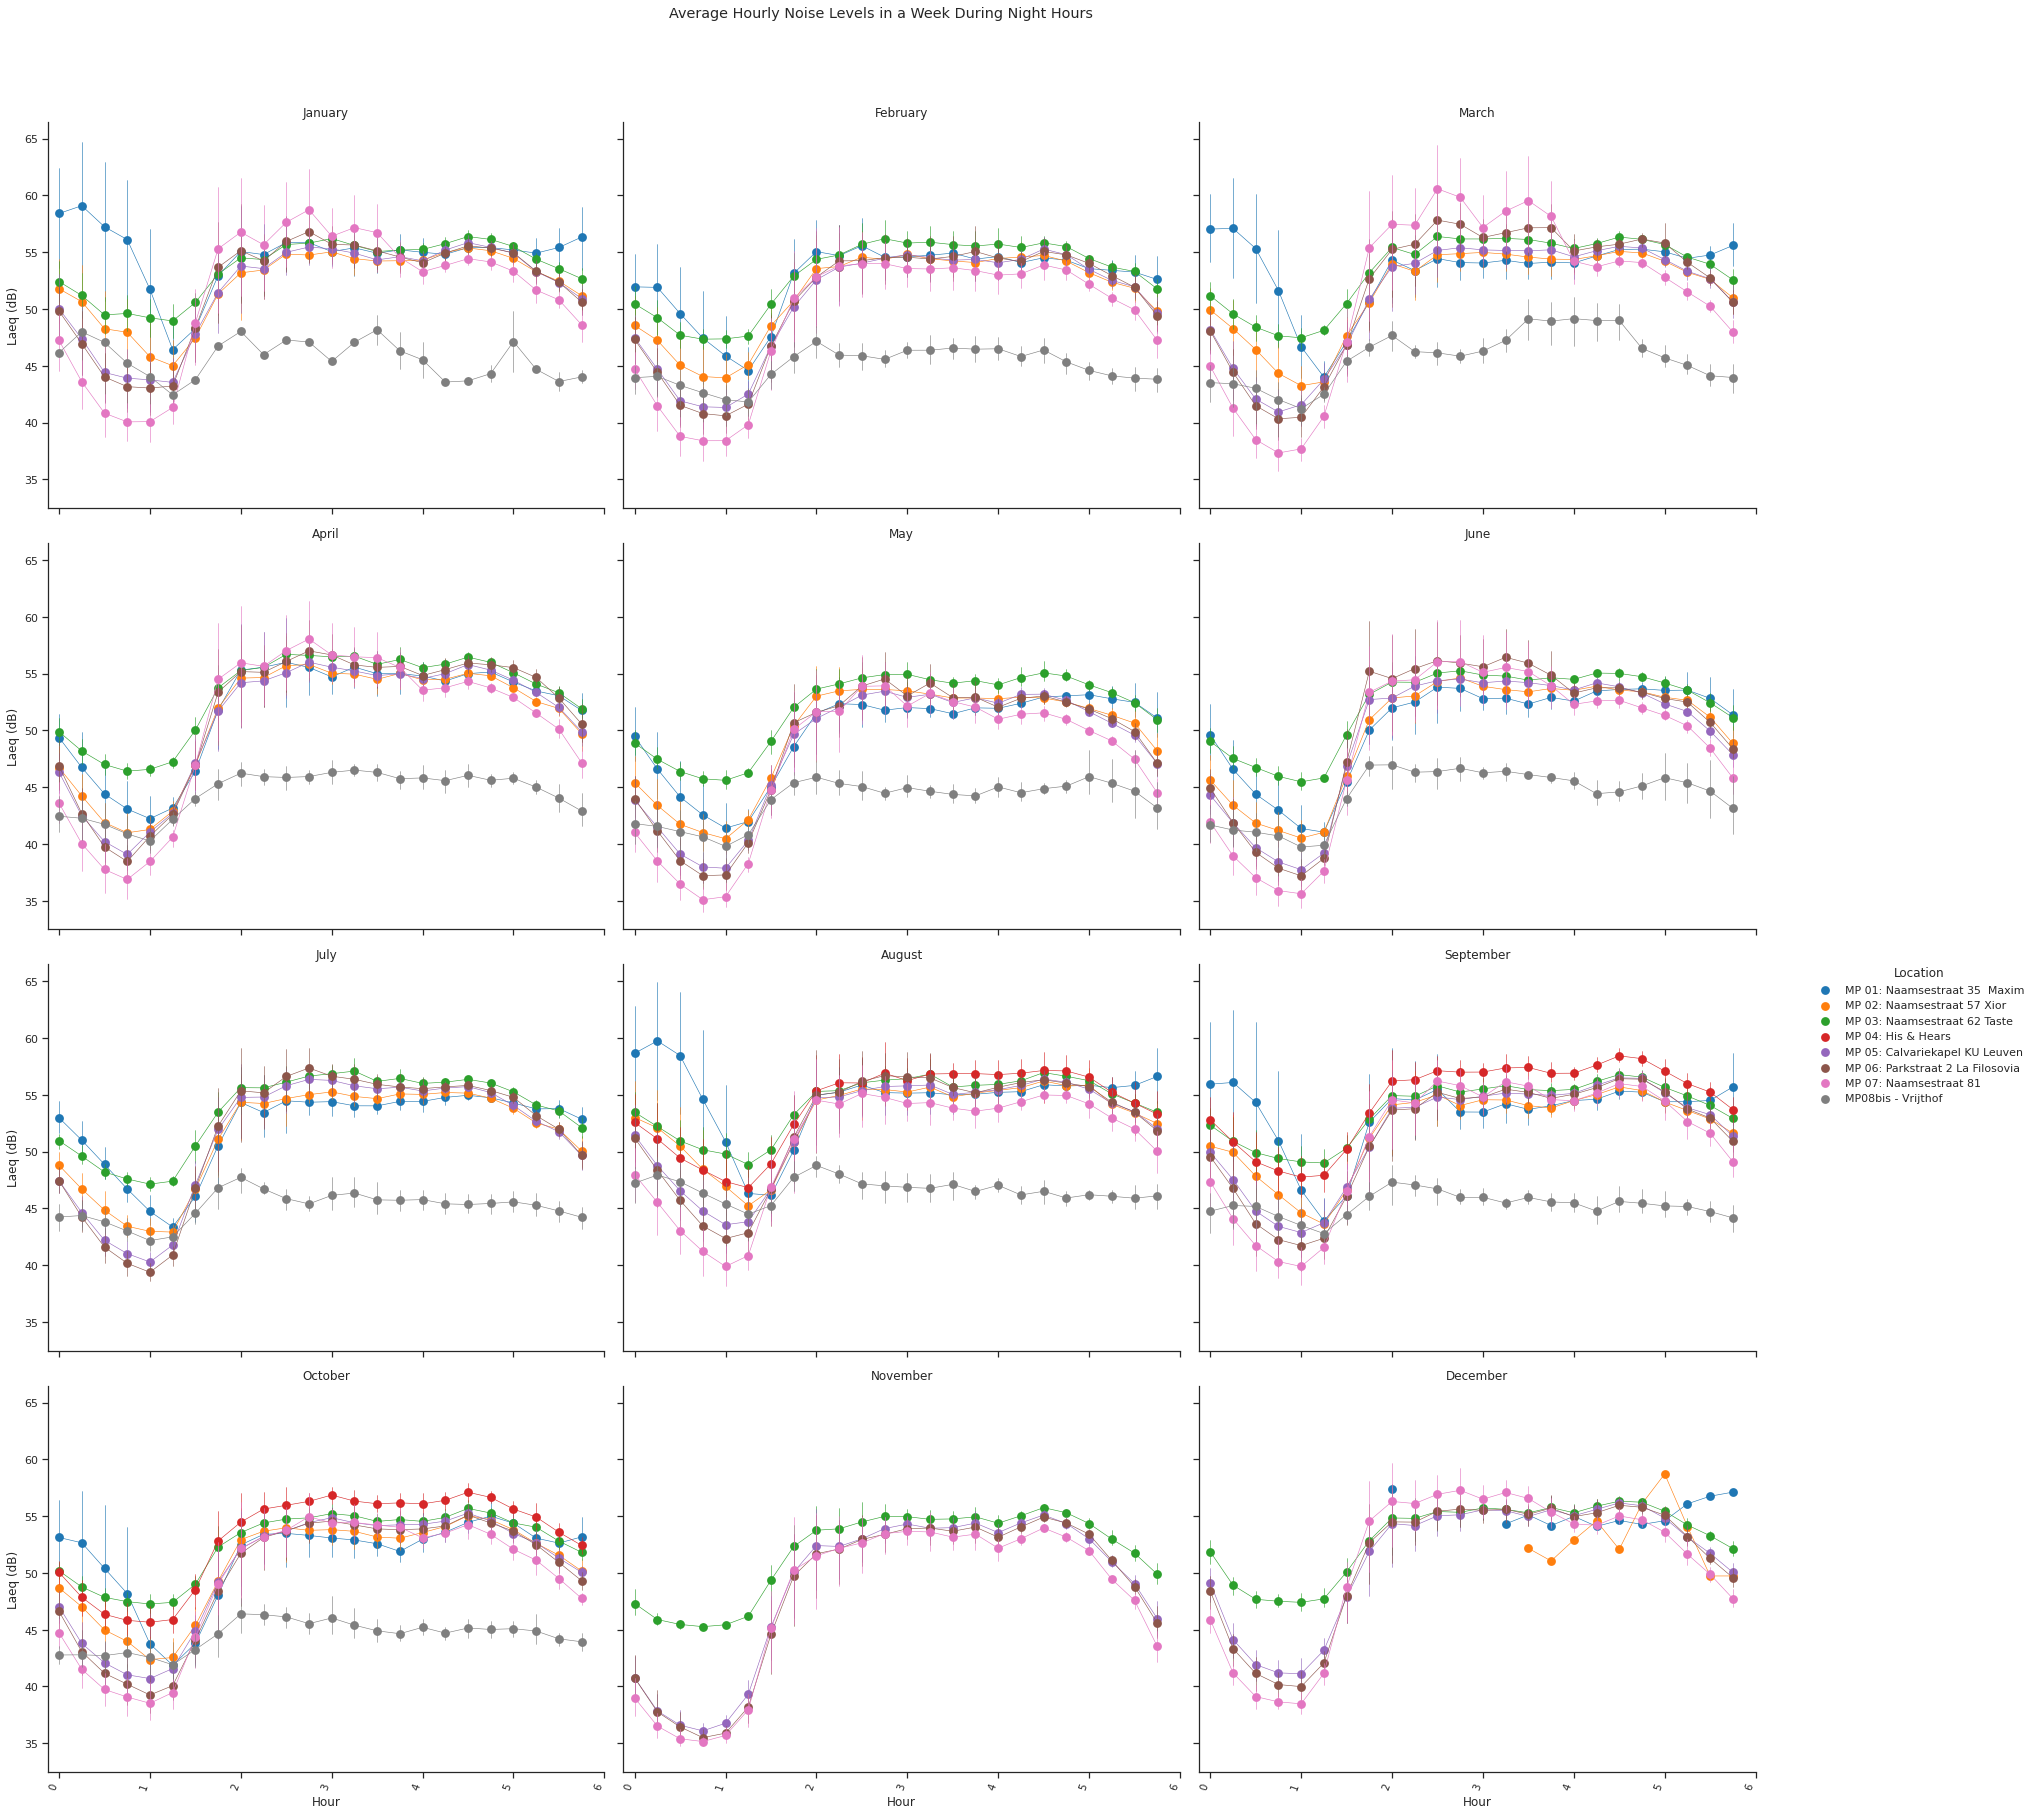

In [43]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a catplot for each month
grid = sns.catplot(
    data=sampled_df,
    x='hour',
    y='laeq',
    hue='description',
    col='month',
    col_wrap=3,
    kind='point',
    height=6,
    aspect=1.2,
    palette='tab10',
    legend=True,
    legend_out=True,
)

# Set titles for each subplot and adjust properties
for i, ax in enumerate(grid.axes.flat):
    ax.set_title(f"Month {i+1}")
    
    # Rotate x-axis labels by 70 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right', fontsize=10)
    
    # Label every 4th hour on the x-axis
    ax.set_xticks(range(0, 25, 4))
    
    # Make lines thinner
    for line in ax.lines:
        line.set_linewidth(0.6)
        
# Set plot titles as month names
month_names = calendar.month_name[1:]  # Exclude empty string at index 0
for ax, month in zip(grid.axes.flat, month_names):
    ax.set_title(month)

# Adjust the spacing between subplots
plt.tight_layout()
sns.move_legend(grid, loc='upper right', bbox_to_anchor=(1.15, 0.5))

# Rename the legend title and increase its size
grid._legend.set_title("Location")

# Set x-axis label
grid.set_axis_labels("Hour", "Laeq (dB)")

# Set plot title
grid.fig.suptitle("Average Hourly Noise Levels in a Week During Night Hours", y=1.05)

# Show the plot
plt.show()


In [20]:
#Hourly noise level of the locations closes to the Q square	
filtered_data = sampled_df[
    sampled_df['description'].isin([
        'MP 03: Naamsestraat 62 Taste',
        'MP 02: Naamsestraat 57 Xior',
        'MP 01: Naamsestraat 35  Maxim'])]


<Figure size 720x432 with 0 Axes>

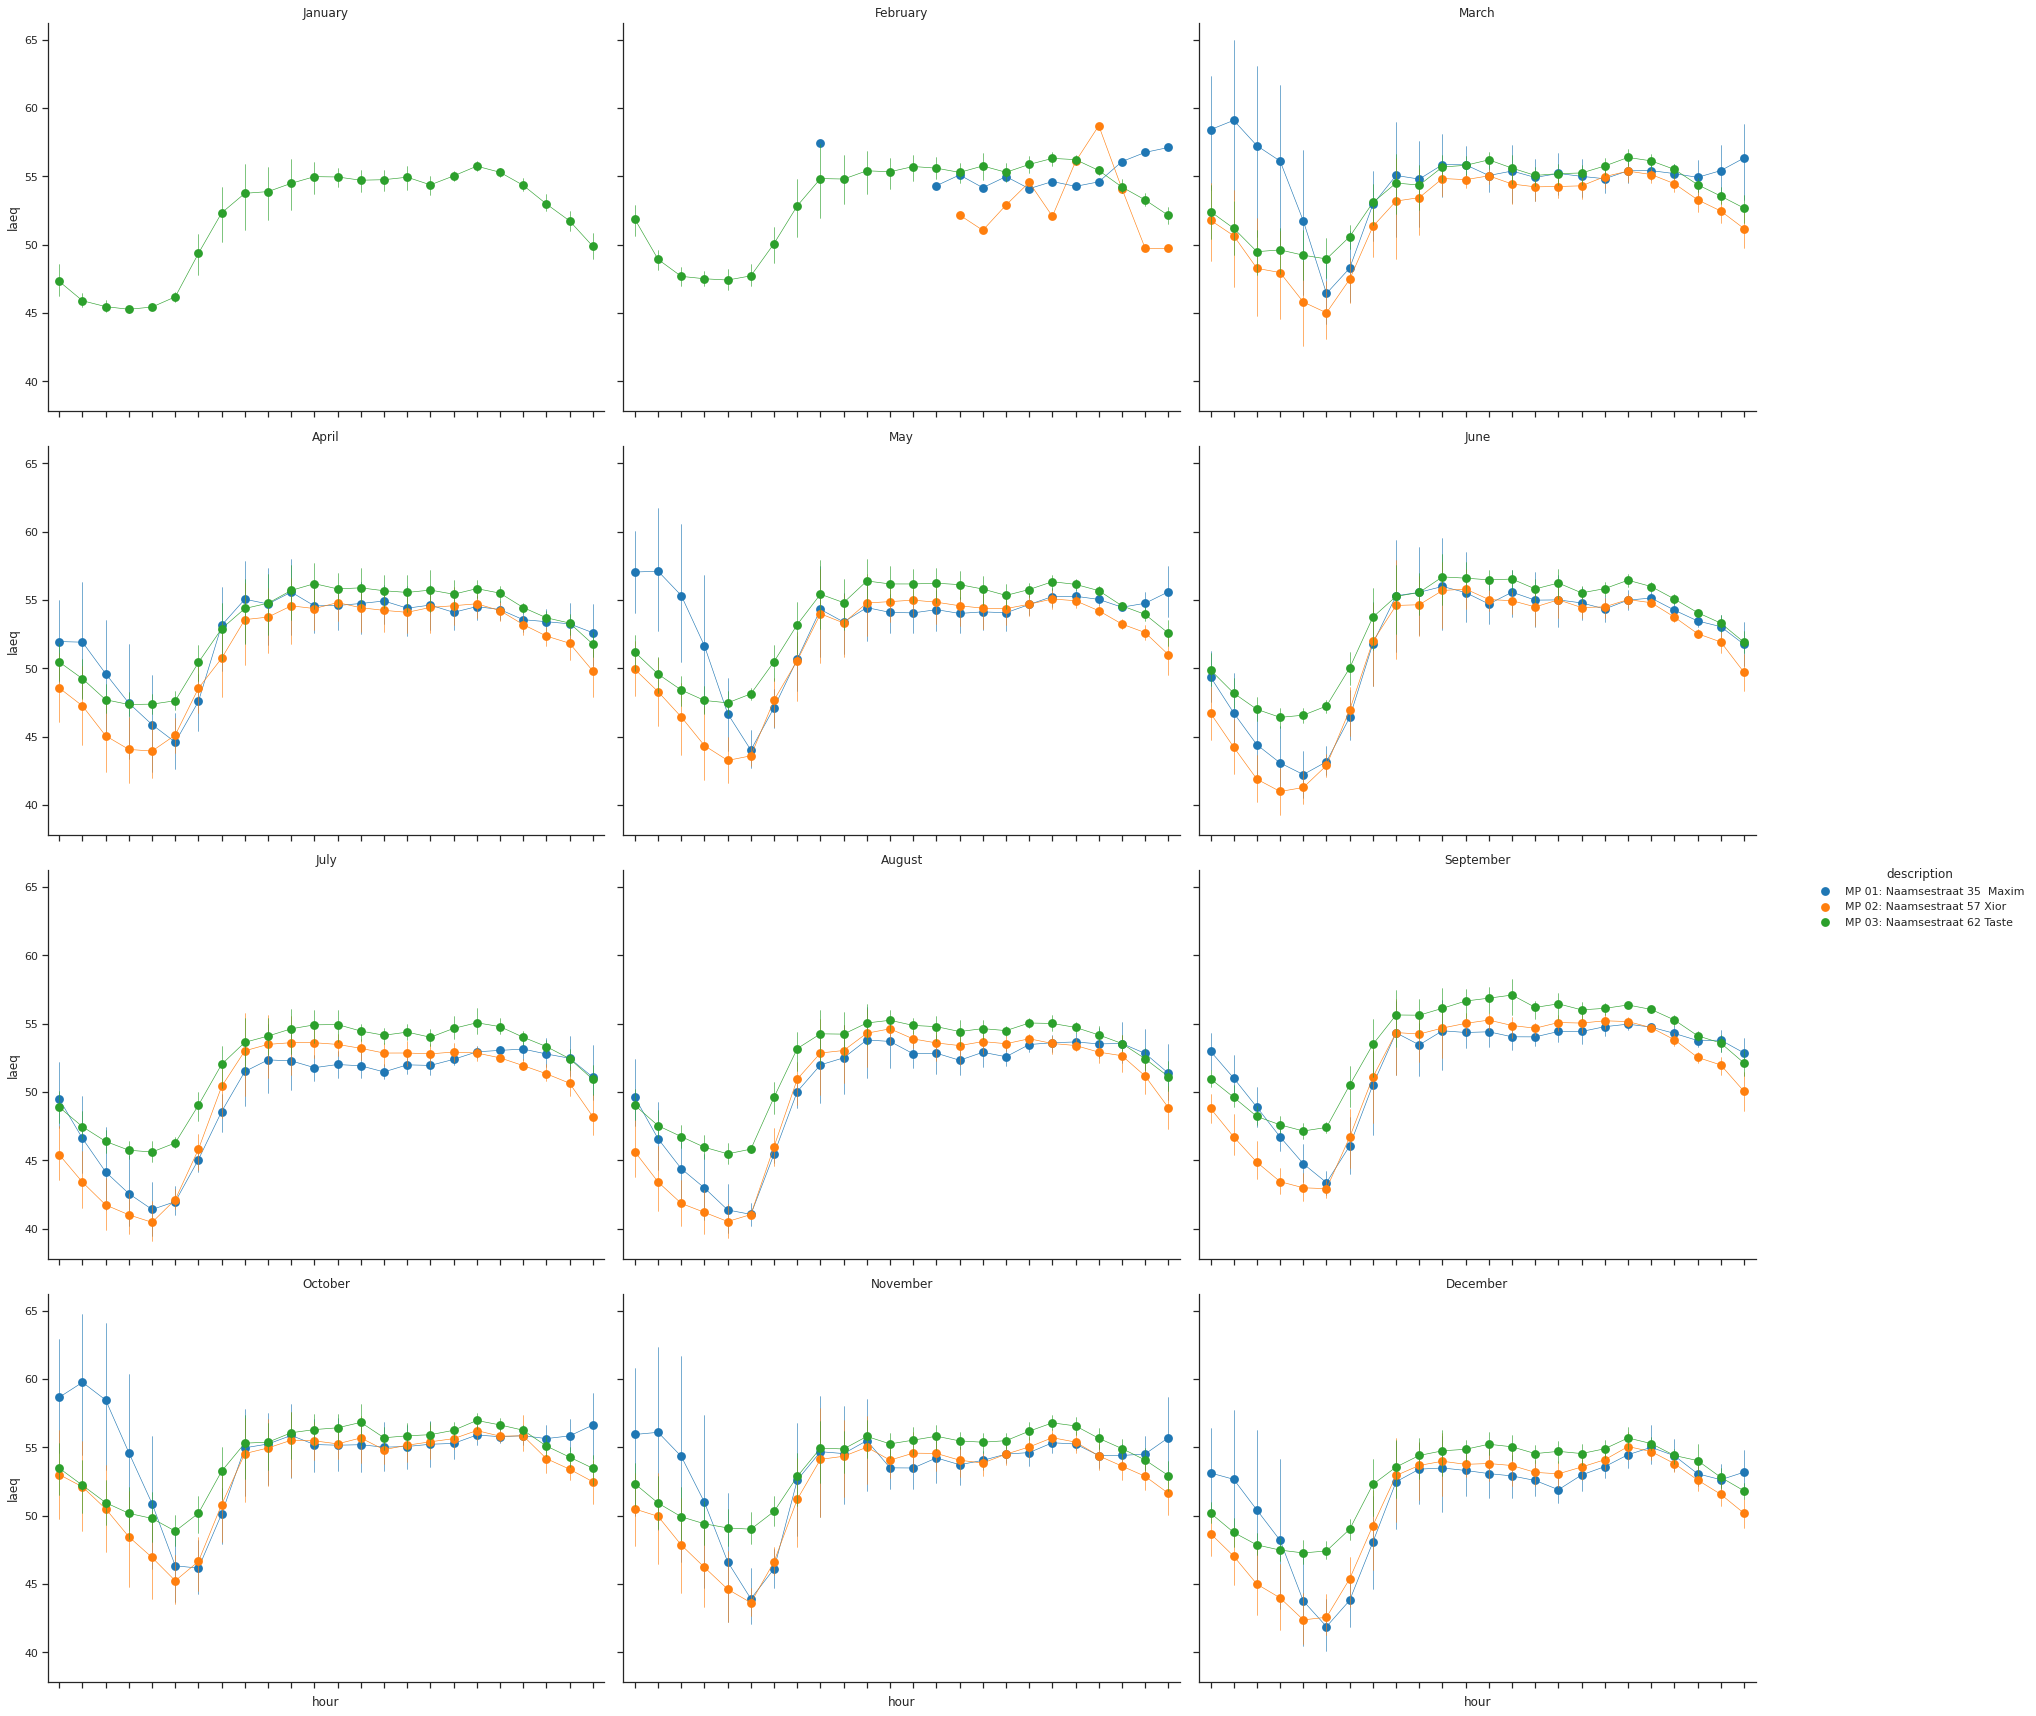

In [40]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a catplot for each month
grid = sns.catplot(
    data=filtered_data,
    x='hour',
    y='laeq',
    hue='description',
    col='month',
    col_wrap=3,
    kind='point',
    height=6,
    aspect=1.2,
    palette='tab10',
    legend=True,
    legend_out=True,
)

# Set titles for each subplot and adjust properties
for i, ax in enumerate(grid.axes.flat):
    ax.set_title(f"Month {i+1}")
    
    # Rotate x-axis labels by 70 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right')
    
    # Show only every 4th label on the x-axis
    if i % 4 != 0:
        ax.set_xticklabels([])
    
    # Make lines thinner
    for line in ax.lines:
        line.set_linewidth(0.6)
        
# Set plot titles as month names
month_names = calendar.month_name[1:]  # Exclude empty string at index 0
for ax, month in zip(grid.axes.flat, month_names):
    ax.set_title(month)

# Adjust the spacing between subplots
plt.tight_layout()
sns.move_legend(grid, loc='upper right', bbox_to_anchor=(1.15, 0.5))

# Show the plot
plt.show()


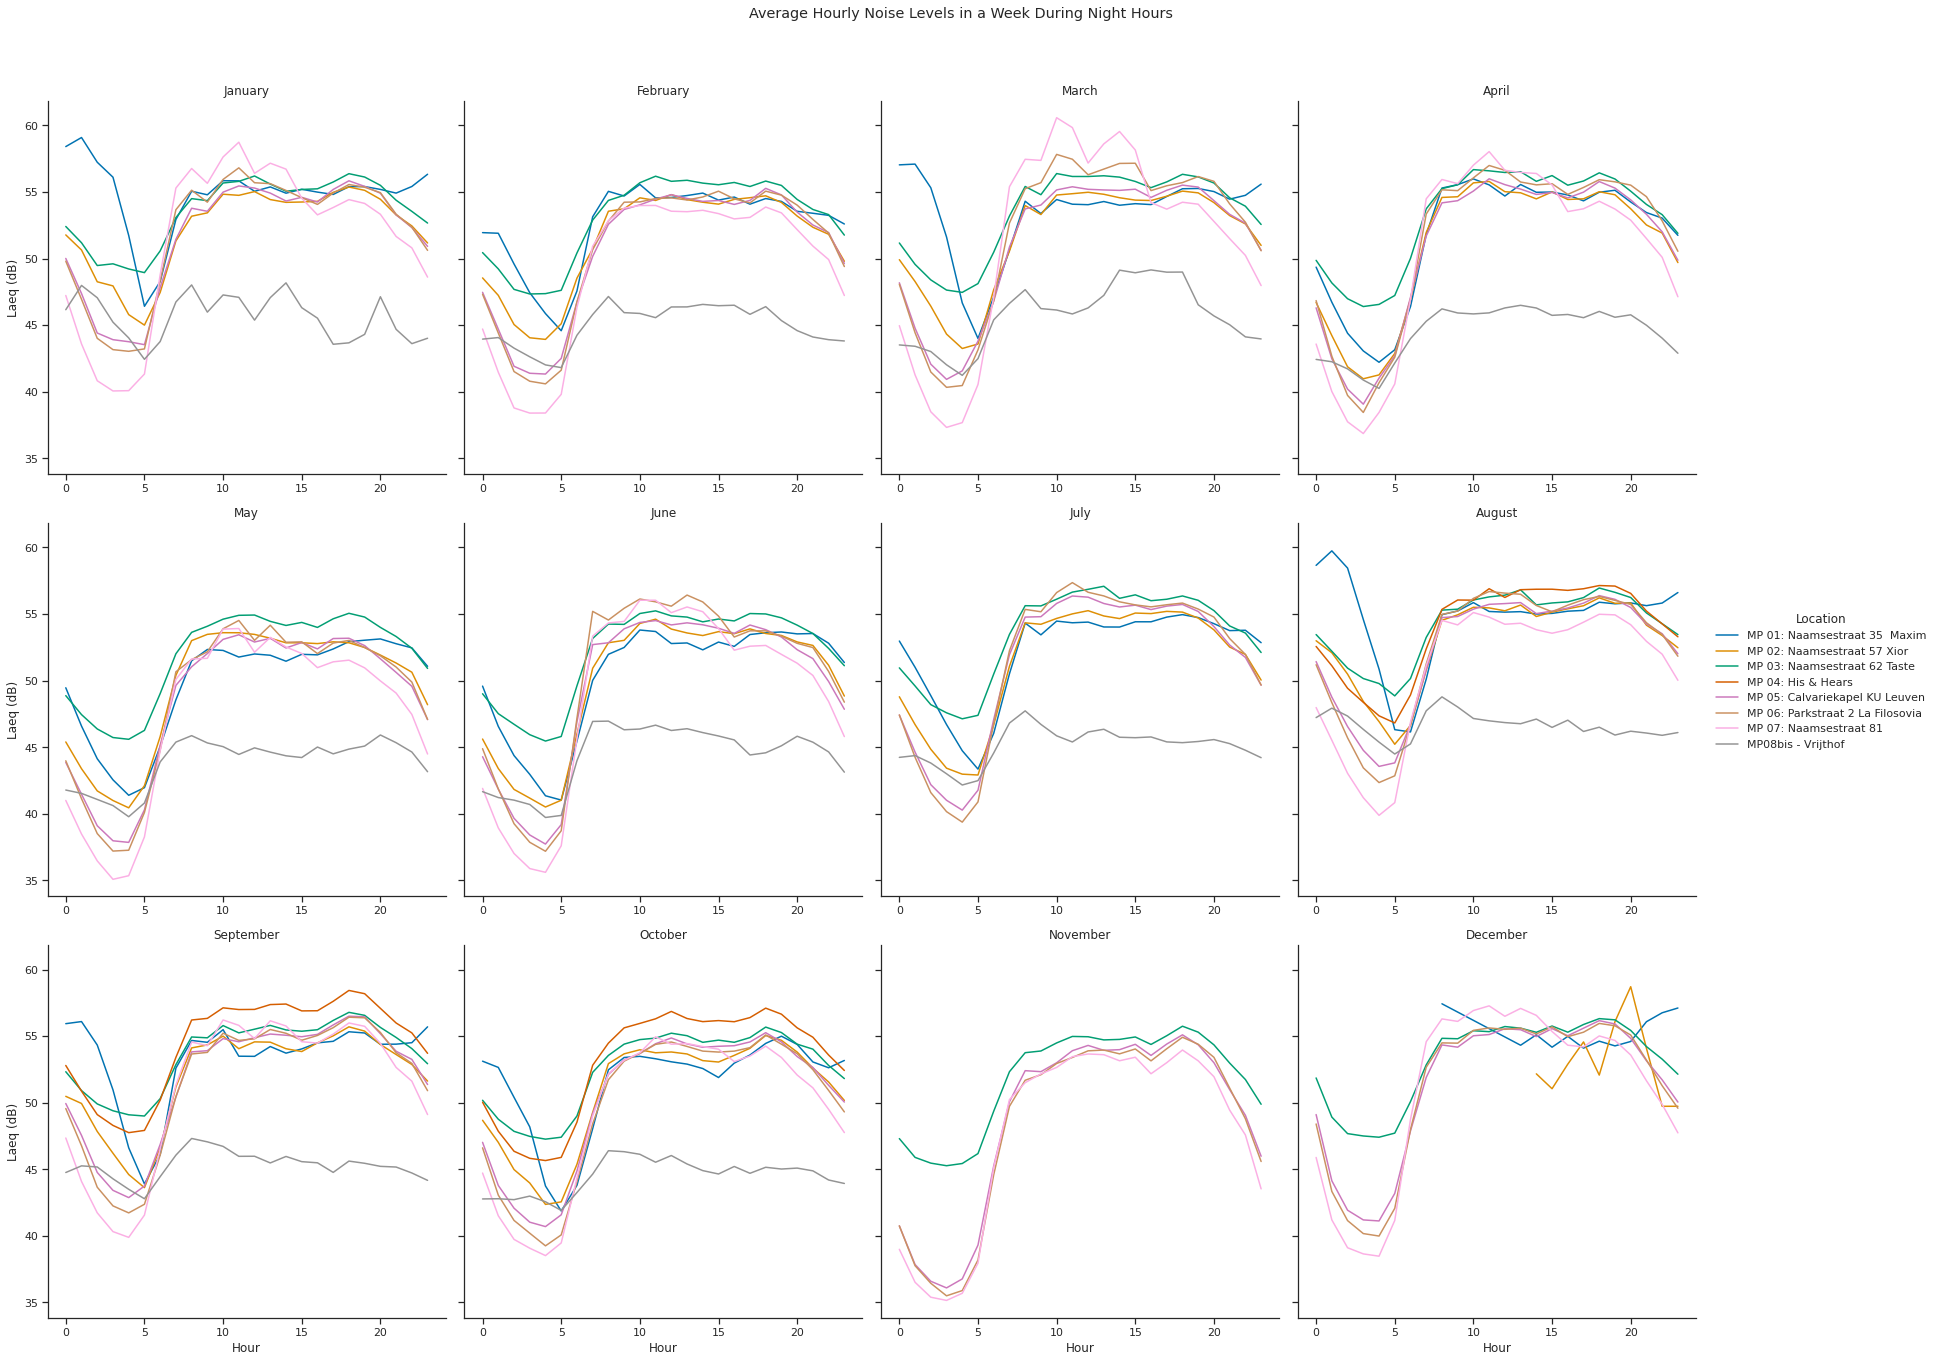

In [38]:
# Set the seaborn theme
sns.set_theme(style="ticks")


# Define the palette as a color-blind friendly palette
palette = "colorblind"

# Plot the lines on two facets
g =sns.relplot(
    data=sampled_df,
    x="hour",y= 'laeq',
    hue="description", col="month",
    kind="line", size_order=[1, 2],
    ci=None,
    height=6, facet_kws=dict(sharex=False),
    col_wrap=4,
    palette = palette
)

# Set plot titles as month names
month_names = calendar.month_name[1:]  # Exclude empty string at index 0
for ax, month in zip(g.axes.flat, month_names):
    ax.set_title(month)

# Rename the legend title and increase its size
g._legend.set_title("Location")

# Set x-axis label
g.set_axis_labels("Hour", "Laeq (dB)")

# Set plot title
g.fig.suptitle("Average Hourly Noise Levels in a Week During Night Hours", y=1.05)

# Show the plot
plt.show()